In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import joblib


In [2]:
df = pd.read_csv(r"heart_disease_10000_rows.csv")

df.head(), df.shape


(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   67    0   2        94   295    1        1      151      1     4.04      0   
 1   57    1   2       154   255    1        0      174      0     2.92      1   
 2   43    1   2       143   277    0        0      123      1     0.97      0   
 3   71    1   1       108   145    1        0      151      1     2.85      2   
 4   36    0   1       186   271    0        1      109      0     5.08      2   
 
    ca  thal  target  
 0   1     3       0  
 1   1     3       0  
 2   3     1       0  
 3   1     1       0  
 4   2     2       0  ,
 (10000, 14))

In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       10000 non-null  int64  
 1   sex       10000 non-null  int64  
 2   cp        10000 non-null  int64  
 3   trestbps  10000 non-null  int64  
 4   chol      10000 non-null  int64  
 5   fbs       10000 non-null  int64  
 6   restecg   10000 non-null  int64  
 7   thalach   10000 non-null  int64  
 8   exang     10000 non-null  int64  
 9   oldpeak   10000 non-null  float64
 10  slope     10000 non-null  int64  
 11  ca        10000 non-null  int64  
 12  thal      10000 non-null  int64  
 13  target    10000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 1.1 MB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

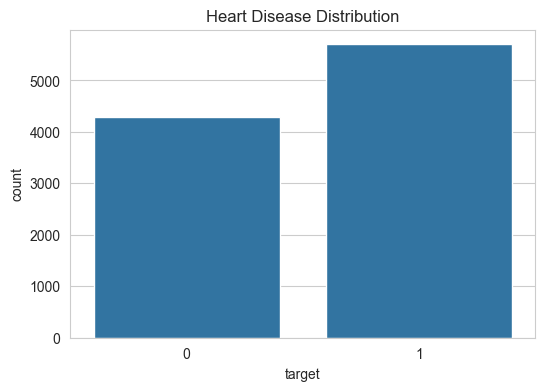

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df)
plt.title("Heart Disease Distribution")
plt.show()


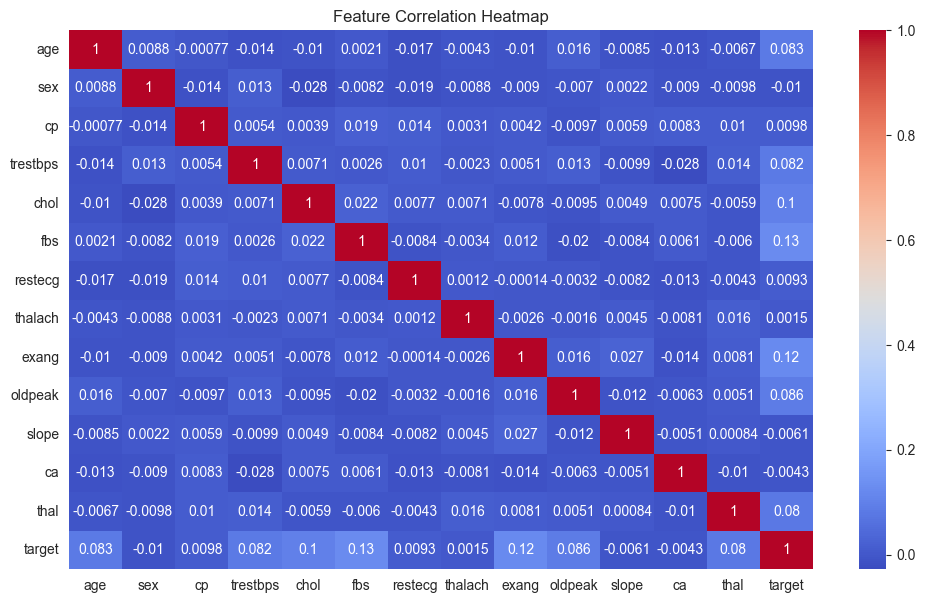

In [5]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
sns.pairplot(df[['age','trestbps','chol','thalach','oldpeak','target']], hue='target')
plt.show()


In [ ]:
X = df.drop("target", axis=1)
y = df["target"]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.20, random_state=42
)


In [ ]:
log_model = LogisticRegression(max_iter=300)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_pred)
log_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1])

print("Logistic Accuracy:", log_acc)
print("Logistic AUC:", log_auc)
print(classification_report(y_test, log_pred))


In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
knn_params = {
    "n_neighbors":[3,5,7,9,11],
    "weights":["uniform","distance"]
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, n_jobs=-1)
knn_grid.fit(X_train, y_train)

knn_model = knn_grid.best_estimator_
knn_pred  = knn_model.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
knn_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,1])

print("Best KNN Params:", knn_grid.best_params_)
print("KNN Accuracy:", knn_acc)
print("KNN AUC:", knn_auc)
print(classification_report(y_test, knn_pred))


In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap="Oranges")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
rf_params = {
    "n_estimators":[100,200],
    "max_depth":[3,5,7,None],
    "criterion":["gini","entropy"]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)

rf_model = rf_grid.best_estimator_
rf_pred  = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])

print("Best RF Params:", rf_grid.best_params_)
print("RF Accuracy:", rf_acc)
print("RF AUC:", rf_auc)
print(classification_report(y_test, rf_pred))


In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
fpr_rf,  tpr_rf,  _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

plt.figure(figsize=(6,5))
plt.plot(fpr_log, tpr_log, label="Logistic")
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.plot(fpr_rf,  tpr_rf,  label="Random Forest")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
models = ["Logistic","KNN","Random Forest"]
accuracy = [log_acc, knn_acc, rf_acc]
auc = [log_auc, knn_auc, rf_auc]

(results_df := pd.DataFrame({
    "Model":models,
    "Accuracy":accuracy,
    "AUC":auc
}))


In [ ]:
results_df.plot(x="Model", y=["Accuracy","AUC"], kind="bar", figsize=(7,4))
plt.title("Model Performance Comparison")
plt.show()


In [ ]:
feat_imp = rf_model.feature_importances_
feat_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feat_imp
}).sort_values(by="Importance", ascending=False)

feat_df.head(10)


In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x="Importance", y="Feature", data=feat_df.head(10))
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


In [ ]:
joblib.dump(scaler, "scaler.pkl")
joblib.dump(log_model, "logistic_model.pkl")
joblib.dump(knn_model, "knn_model.pkl")
joblib.dump(rf_model, "rf_model.pkl")

print(" All models saved successfully for Streamlit!")
